In [53]:
# --- Importation des bibliothèques principales ---
import pandas as pd                    # Manipulation de données tabulaires
import numpy as np                     # Calculs numériques et algèbre linéaire
import matplotlib.pyplot as plt        # Visualisations statiques
import seaborn as sns                  # Visualisations statistiques avancées
from io import StringIO                # Lecture de chaînes comme fichiers
import warnings                        # Gestion des avertissements

# --- Bibliothèques de Machine Learning (scikit-learn) ---
from sklearn.model_selection import train_test_split  # Division train/test
from sklearn.compose import ColumnTransformer         # Préprocessing par colonnes
from sklearn.preprocessing import OneHotEncoder       # Encodage variables catégorielles
from sklearn.linear_model import LinearRegression     # Modèle de régression linéaire
from sklearn.pipeline import Pipeline                 # Pipeline de transformations
from sklearn.metrics import (                         # Métriques d'évaluation
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)

In [ ]:
df=pd.read_csv("face.csv", sep=',')

: 

: 

In [ ]:
##  verification des dimention de notre jeux de donnees 

df.shape

(1143, 15)

: 

: 

In [ ]:
## verifications des colonnes existantes

df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

: 

: 

In [ ]:
## verifications du type des colones

df.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

: 

: 

In [ ]:

## convertion pour faciliter les annalyse temporelle

df["reporting_start"] = pd.to_datetime(df["reporting_start"])
df["reporting_end"] = pd.to_datetime(df["reporting_end"])


C:\Users\roosv\AppData\Local\Temp\ipykernel_50564\1953883262.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["reporting_start"] = pd.to_datetime(df["reporting_start"])
C:\Users\roosv\AppData\Local\Temp\ipykernel_50564\1953883262.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["reporting_end"] = pd.to_datetime(df["reporting_end"])


: 

: 

In [ ]:
## changeons pour plus de pour plus de professionalisme le type des colones interest

df[["interest1", "interest2", "interest3"]] = (
    df[["interest1", "interest2", "interest3"]].astype("category")
)


: 

: 

In [ ]:
## pour une meilleur annalyse on vas essayer de regrouper les 03 type d interet dans une seul colone

df["interests"] = df[["interest1", "interest2", "interest3"]] \
    .astype(str) \
    .agg(",".join, axis=1)

: 

: 

In [ ]:
## visualisation des 5 premiere ligne

df.head(5)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,interests
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,"15,17,17"
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,"16,19,21"
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,"20,25,22"
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,"28,32,32"
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,"28,33,32"


: 

: 

In [ ]:
##  verifications des valeur null et des valeur dupliquees

df_null=df.isna().sum()
df_duplicated=df.duplicated().sum()
print(f"les valeurs null sont{df_null} et le valeur dupliquees sont {df_duplicated}")

les valeurs null sontad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
interests                0
dtype: int64 et le valeur dupliquees sont 0


: 

: 

Une partie des campagnes ne génère aucune conversion, ce qui est courant en publicité digitale. Ces observations vont etre conservées afin de refléter fidèlement la performance réelle des campagnes, tandis que les indicateurs de rentabilité vont etre calculés uniquement pour les publicités ayant généré au moins une conversion

In [ ]:
# 7) Fonction pour éviter les divisions par zéro

def safe_div(n, d):
    return np.where(d == 0, np.nan, n / d)


: 

: 

In [ ]:
# 3) Nettoyage / renommage
rename_map = {
    "age": "age_group",
    "spent": "ad_spend",
    "total_conversion": "total_conversions",
    "approved_conversion": "approved_conversions",
}
df = df.rename(columns=rename_map)

: 

: 

In [ ]:
## verifications des statistiques descriptives

df.describe()

,ad_id,reporting_start,reporting_end,impressions,clicks,ad_spend,total_conversions,approved_conversions
count,1.143000e+03,1143,1143,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,2017-08-23 00:26:27.401574912,2017-08-23 00:26:27.401574912,6.872500e+04,11.629921,17.597760,2.161629,0.768725
min,7.087460e+05,2017-08-17 00:00:00,2017-08-17 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,2017-08-20 00:00:00,2017-08-20 00:00:00,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,2017-08-23 00:00:00,2017-08-23 00:00:00,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,2017-08-26 00:00:00,2017-08-26 00:00:00,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,2017-08-30 00:00:00,2017-08-30 00:00:00,3.052003e+06,340.000000,639.949998,60.000000,21.000000
std,1.939928e+05,NaN,NaN,2.067023e+05,27.347899,48.418711,4.062201,1.656445


: 

: 

L’analyse descriptive met en évidence une forte hétérogénéité des performances publicitaires. La majorité des annonces génèrent peu d’impressions et aucune conversion, tandis qu’un nombre restreint de campagnes concentre l’essentiel des clics, des dépenses et des conversions, phénomène classique en publicité digitale.

In [ ]:
df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age_group', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'ad_spend', 'total_conversions',
       'approved_conversions', 'interests'],
      dtype='object')

: 

: 

Calculer les KPI

CTR (%) = % de clics par impression

CPC = coût par clic

CPA = coût par conversion approuvée

CPM = coût pour 1000 impressions

In [ ]:
# 8) Calculer les KPI (CTR, CPC, CPA, CPM)

df["ctr_pct"] = safe_div(df["clicks"], df["impressions"]) * 100
df["cpc"]     = safe_div(df["ad_spend"], df["clicks"])
df["cpa"]     = safe_div(df["ad_spend"], df["approved_conversions"])
df["cpm"]     = safe_div(df["ad_spend"], df["impressions"]) * 1000

df[["impressions", "clicks", "ad_spend", "ctr_pct", "cpc", "cpa", "cpm"]].head(10)


,impressions,clicks,ad_spend,ctr_pct,cpc,cpa,cpm
0,7350.0,1,1.43,0.013605,1.430000,1.43,0.194558
1,17861.0,2,1.82,0.011198,0.910000,NaN,0.101898
2,693.0,0,0.00,0.000000,NaN,NaN,0.000000
3,4259.0,1,1.25,0.023480,1.250000,NaN,0.293496
4,4133.0,1,1.29,0.024195,1.290000,1.29,0.312122
5,1915.0,0,0.00,0.000000,NaN,0.00,0.000000
6,15615.0,3,4.77,0.019212,1.590000,NaN,0.305476
7,10951.0,1,1.27,0.009132,1.270000,1.27,0.115971
8,2355.0,1,1.50,0.042463,1.500000,NaN,0.636943
9,9502.0,3,3.16,0.031572,1.053333,NaN,0.332562


: 

: 

In [ ]:
df[["impressions","ctr_pct", "cpc", "cpa", "cpm"]].describe()


,impressions,ctr_pct,cpc,cpa,cpm
count,1.143000e+03,1139.000000,937.000000,353.000000,1139.000000
mean,6.872500e+04,2.626820,1.019036,22.580322,9.924296
std,2.067023e+05,7.022458,0.662170,34.889123,44.818362
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.442650e+02,0.011050,0.333333,1.330000,0.000000
50%,3.142000e+03,0.023214,1.280000,5.910000,0.245249
75%,2.786400e+04,2.574741,1.589200,31.125000,0.490030
max,3.052003e+06,93.750002,2.212000,232.370001,671.140935


: 

: 

In [ ]:
## KPI globeau

print("CTR moyen (%) :", df["ctr_pct"].mean())
print("CPC moyen (€) :", df["cpc"].mean())
print("CPA moyen (€) :", df["cpa"].mean())
print("CPM moyen (€) :", df["cpm"].mean())


CTR moyen (%) : 2.6268196122840277
CPC moyen (€) : 1.0190361840968118
CPA moyen (€) : 22.58032234380654
CPM moyen (€) : 9.924296058968352


: 

: 

In [ ]:
kpi_resume = df[["ctr_pct", "cpc", "cpa", "cpm"]].mean().round(2)
print(kpi_resume)


ctr_pct     2.63
cpc         1.02
cpa        22.58
cpm         9.92
dtype: float64


: 

: 

<Axes: >

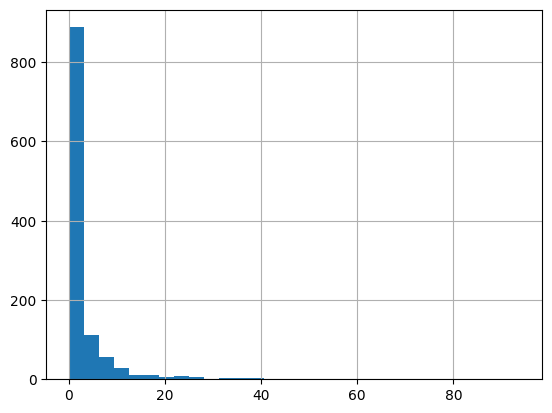

: 

: 

In [ ]:
df["ctr_pct"].hist(bins=30)


In [ ]:
# 10) Résumé global (KPIs généraux)

total_impr = df["impressions"].sum()
total_clicks = df["clicks"].sum()
total_spend = df["ad_spend"].sum()
total_conv = df["approved_conversions"].sum(skipna=True)

print("Impressions:", total_impr)
print("Clicks:", total_clicks)
print("Spend:", total_spend)
print("Approved conversions:", total_conv)

print("CTR global (%):", (total_clicks / total_impr * 100)) 
print("CPC global:", (total_spend / total_clicks) )
print("CPA global:", (total_spend / total_conv) )


Impressions: 78552672.98996094
Clicks: 13293
Spend: 20114.239997279998
Approved conversions: 585.0
CTR global (%): 0.016922403139227167
CPC global: 1.513145264220266
CPA global: 34.383316234666665


: 

: 

In [ ]:
# 11) Analyse par segment (âge + genre)
seg = (df.groupby(["age_group", "gender"], dropna=False)
         .agg(impressions=("impressions", "sum"),
              clicks=("clicks", "sum"),
              spend=("ad_spend", "sum"),
              approved_conversions=("approved_conversions", "sum"))
         .reset_index())

seg["ctr_pct"] = safe_div(seg["clicks"], seg["impressions"]) * 100
seg["cpc"]     = safe_div(seg["spend"], seg["clicks"])
seg["cpa"]     = safe_div(seg["spend"], seg["approved_conversions"])

print(seg.sort_values("cpa").head(10))


    age_group gender   impressions  clicks        spend  approved_conversions  \
156     30-34      F  1.149027e+06     222   301.920000                  43.0   
168     35-39      F  8.794370e+05     232   323.410001                  23.0   
157     30-34      M  3.452957e+07    4211  7391.299994                 285.0   
172     40-44      F  9.732190e+05     258   376.840000                  13.0   
169     35-39      M  1.928594e+07    2773  4822.110003                 106.0   
175     45-49      M  3.302425e+06     603   995.830003                  21.0   
173     40-44      M  1.490837e+07    2402  3960.789999                  69.0   
174     45-49      F  3.485604e+06     973  1448.039997                  25.0   
0          10     11  4.650800e+02       8     2.000000                   0.0   
1          10     12  8.228000e+01       1     0.000000                   0.0   

      ctr_pct       cpc        cpa  
156  0.019321  1.360000   7.021395  
168  0.026381  1.394009  14.061304

: 

: 

In [ ]:
# =========================
# 9) ANALYSE TEMPORELLE (si dates présentes)
# =========================
time_table = None
if "reporting_start" in df.columns and df["reporting_start"].notna().any():
    df["date"] = df["reporting_start"].dt.date
    time_table = (df.groupby("date", dropna=False)
                    .agg(
                        impressions=("impressions", "sum"),
                        clicks=("clicks", "sum"),
                        spend=("ad_spend", "sum"),
                        approved_conversions=("approved_conversions", "sum"),
                    )
                    .reset_index())
    time_table["ctr_pct"] = safe_div(time_table["clicks"], time_table["impressions"]) * 100
    time_table["cpc"] = safe_div(time_table["spend"], time_table["clicks"])
    time_table["cpa"] = safe_div(time_table["spend"], time_table["approved_conversions"])
    time_table["cpm"] = safe_div(time_table["spend"], time_table["impressions"]) * 1000


: 

: 

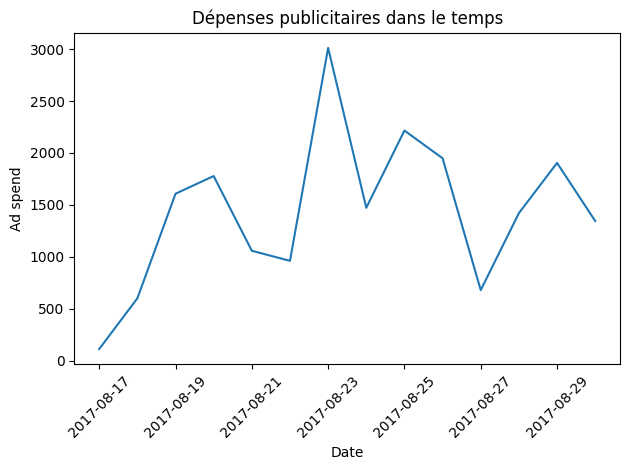

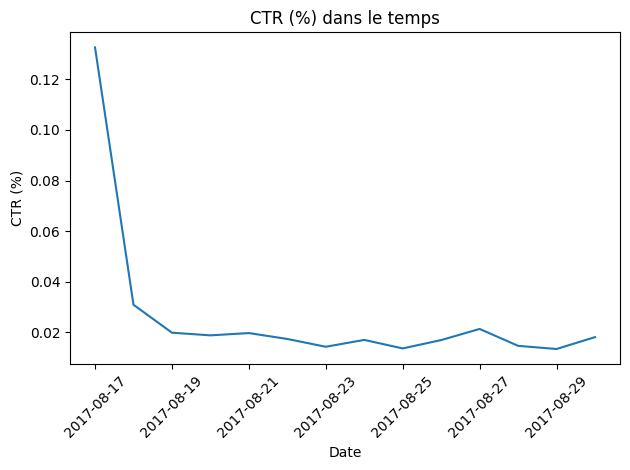

: 

: 

In [ ]:
# =========================
# 10) VISUALISATIONS (matplotlib)
# =========================
# 10.1 Tendance temporelle (si dispo)
if time_table is not None and len(time_table) > 1:
    plt.figure()
    plt.plot(time_table["date"], time_table["spend"])
    plt.title("Dépenses publicitaires dans le temps")
    plt.xlabel("Date")
    plt.ylabel("Ad spend")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(time_table["date"], time_table["ctr_pct"])
    plt.title("CTR (%) dans le temps")
    plt.xlabel("Date")
    plt.ylabel("CTR (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

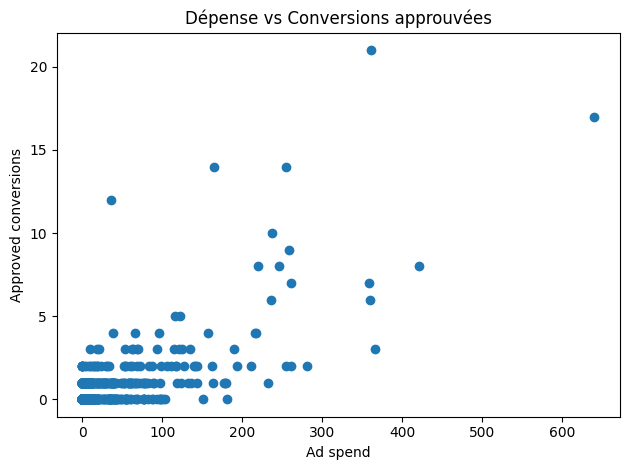

: 

: 

In [ ]:
# 10.2 Spend vs conversions (scatter)
plt.figure()
plt.scatter(df["ad_spend"], df["approved_conversions"])
plt.title("Dépense vs Conversions approuvées")
plt.xlabel("Ad spend")
plt.ylabel("Approved conversions")
plt.tight_layout()
plt.show()

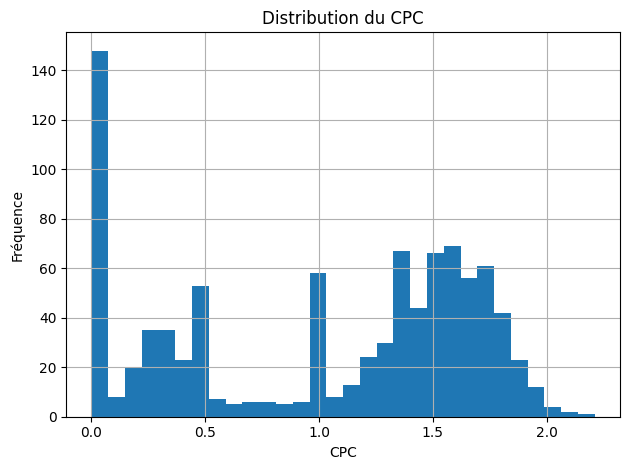

: 

In [ ]:
# 10.3 Distribution CPC (hist)
plt.figure()
df["cpc"].dropna().hist(bins=30)
plt.title("Distribution du CPC")
plt.xlabel("CPC")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()